[ 0.5  0.5]
[[-2  2]
 [ 2 -2]]
[[[2 0]
  [0 2]]

 [[2 0]
  [0 2]]]


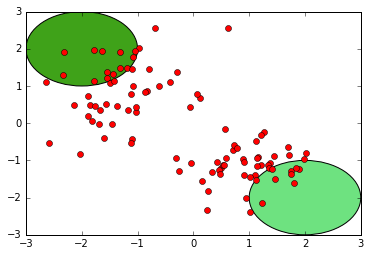

-----------
[ 0.49977041  0.3850202 ]
[[-1  0]
 [ 1 -1]]
[[[1 0]
  [0 1]]

 [[1 0]
  [0 1]]]


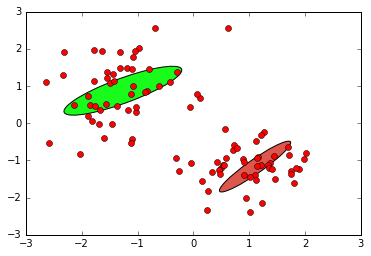

-----------
[ 0.55248573  0.16370483]
[[-1  0]
 [ 0 -1]]
[[[0 0]
  [0 1]]

 [[0 0]
  [0 0]]]


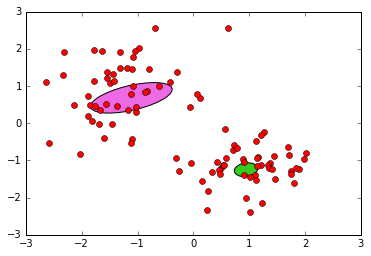

LinAlgError: singular matrix

In [168]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import colorsys
from scipy.stats import multivariate_normal

data = pd.read_csv("Lab 2/dataForGMMExample1.csv", sep=',')
X = np.array(data)

K = 2
mu = np.array([[-2, 2], [2, -2]])
sigma = np.array([np.diag((2, 2)), np.diag((2, 2))])
pi = np.array([0.5, 0.5])

def mar_gamma(n, mu, sigma, X, pi):
    ans = 0
    for i in range(K):
        ans += pi[i] * multivariate_normal.pdf(X[n], mu[i], sigma[i], allow_singular = True)
    return ans
    
def gamma(n, k, mu, sigma, X, pi):
    marginal = mar_gamma(n, mu, sigma, X, pi)
    p = multivariate_normal.pdf(X[n], mu[k], sigma[k])
    return pi[k] * p / marginal

def nk(k, mu, sigma, X, pi):
    gz = [gamma(i, k, mu, sigma, X, pi) for i in range(len(X))]
    return np.sum(gz)

def npik(k, mu, sigma, X, pi): 
    gz = nk(k, mu, sigma , X, pi)
    n = X.shape[0]
    return gz / n

def nmuk(k, mu, sigma, X, pi):
    gz = [gamma(i, k, mu, sigma, X, pi) for i in range(len(X))]
    gz = np.array([gz])
    ans = gz.dot(X)
    den = nk(k, mu, sigma, X, pi)
    return ans / den

def nsigk(k, mu, sigma, X, pi):
    gz = [gamma(i, k, mu, sigma, X, pi) for i in range(len(X))]
    gz = np.array([gz]).T
    a = X - mu[k]
    s = X.shape[0]
    ans = np.zeros(sigma[0].shape)
    for i in range(s):
        tmp = np.array([a[i]])
        b = tmp.T.dot(tmp)
        b = gz[i][0] * b
        ans += b
    den = nk(k, mu, sigma, X, pi)
    return ans / den

def plot_cov(cov, mu):
    fig = plt.figure(0)
    ax = fig.add_subplot(111)
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi 
    ellip = mpl.patches.Ellipse(xy=mu, width=v[1], height=v[0], angle=angle)
    ax.add_artist(ellip)
    ellip.set_facecolor(rnd.rand(3))
    ellip.set_clip_box(ax.bbox)
    return ellip


pip = pi
mup = mu
sigmap = sigma

def debug_params():
    print (pi)
    print (mu)
    print (sigma)
    
debug_params()
plot_cov(sigma[0], mu[0])
plot_cov(sigma[1], mu[1])
plt.plot(X[:,0], X[:,1], 'ro')
plt.show()

for it in range(10):
    for i in range(K):
        npi = npik(i, mu, sigma, X, pi)
        nmu = nmuk(i, mu, sigma, X, pi)
        nsig = nsigk(i, mu, sigma, X, pi)
        plot_cov(nsig, nmu[0])
        pip[i] = npi
        mup[i] = nmu[0]
        sigmap[i] = nsig
        
    pi = pip
    mu = mup
    # sigma = sigmap
    print('-----------')
    debug_params()
    plt.plot(X[:,0], X[:,1], 'ro')
    plt.show()
